In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
def fuzz_UpperMemFunc(x_var, typeOfMf, lst):
    '''
    returns Upper membership values.
    
    keyword arguments:
    
    x_var -- x range of variable var
    typeOfMf -- type of membershi function
    lst -- list of values provided
    '''
    
    if typeOfMf == 'trimf':
        return fuzz.trimf(x_var,lst)
    elif typeOfMf == 'gaussmf':
        mean, sigma = lst
        return fuzz.gaussmf(x_var, mean, sigma)
    elif typeOfMf == 'gauss2mf':
        mean1, sigma1, mean2, sigma2 = lst
        return fuzz.gauss2mf(x_var, mean1, sigma1, mean2, sigma2)
    elif typeOfMf == 'trapmf':
#         print(fuzz.trapmf(var, lst))
        return fuzz.trapmf(x_var, lst)
    elif typeOfMf == 'gbellmf':
        a,b,c = lst
        return fuzz.gbellmf(x_var, a, b, c)

In [3]:
def fuzz_LowerMemFunc(x_var, typeofMf, lst):
    '''
    returns Lower membership values.
    
    keyword arguments:
    
    x_var -- x range of variable var
    typeOfMf -- type of membershi function
    lst -- list of values provided
    '''
    if typeofMf == 'trimf':
        return triLmf(x_var, lst)
    elif typeofMf == 'trapmf':
        return trapLmf(x_var, lst)
    elif typeofMf == 'gaussmf':
        mean, sigma, height = lst
        return gaussLmf(x_var, mean, sigma, height)

In [4]:
def triLmf(x, abch):
    '''
    returns the triangular lower membership values.
    
    keyword arguments:
    
    x -- x range of the variable
    abch -- list of values with upper bound included
    '''
    
    assert len(abch) == 4, 'abc parameter must have exactly three elements.'
    a, b, c, h = np.r_[abch]     # Zero-indexing in Python
    assert a <= b and b <= c, 'abc requires the three elements a <= b <= c.'

    y = np.zeros(len(x))

    # Left side
    if a != b:
        idx = np.nonzero(np.logical_and(a < x, x < b))[0]
        y[idx] = ((x[idx] - a) / float(b - a)) * h #left side bounded by height h

    # Right side
    if b != c:
        idx = np.nonzero(np.logical_and(b < x, x < c))[0]
        y[idx] = ((c - x[idx]) / float(c - b)) * h #right side bounded by height h

    idx = np.nonzero(x == b)
    y[idx] = h #center part at height h
    return y


In [5]:
def trapLmf(x, abcdh):
    '''
    returns the trapzoidal lower membership values.
    
    keyword arguments:
    
    x -- x range of the variable
    abcdh -- list of values with upper bound included
    '''
    
    assert len(abcdh) == 5, 'abcd parameter must have exactly four elements.'
    a, b, c, d, h = np.r_[abcdh]
    assert a <= b and b <= c and c <= d, 'abcd requires the four elements \
                                          a <= b <= c <= d.'
    y = np.full(np.shape(x),h)

    idx = np.nonzero(x <= b)[0]
    y[idx] = triLmf(x[idx], np.r_[a, b, b, h])

    idx = np.nonzero(x >= c)[0]
    y[idx] = triLmf(x[idx], np.r_[c, c, d, h])

    idx = np.nonzero(x < a)[0]
    y[idx] = np.zeros(len(idx))

    idx = np.nonzero(x > d)[0]
    y[idx] = np.zeros(len(idx))

    return y


In [6]:
def gaussLmf(x, mean, sigma, h):
    '''
    returns the gaussian lower membership values.
    
    keyword arguments:
    
    x -- x range of the variable
    mean -- mean of the graph
    sigma -- standard deviation along the range
    h -- upper bound of the LMF
    '''
    return (np.exp(-((x - mean)**2.) / (2 * sigma**2.)))*h

In [7]:
def fuzz_IT2_Inputs(x_var, var):
    '''
    returns the list of tuple of upper and lower membership values along the range
    and the list of linguistic terms chosen.
    
    keyword arguments:
    
    x_var -- x range of the variable var
    var -- variable name
    '''
    
#   input linguistic terms for a linguistic variable.  
    lst = input(f'Enter the fuzzy inputs for variable {var}:').split(' ') 

    umf = [] #list to store upper membership values
    lmf = [] #list to store lower membership values
    
    for i in range(len(lst)):
        typeofMf = input(f'Enter the type of membership function for {lst[i]} {var}:')
        
        '''The input format here is first for upper membership function
        and then for lower membership function along with height.
        
        ex: trapziodal func: [a b c d e f g h i]
        [a b c d] -- upper membership function
        [e f g h i] -- lower membership function with height i
        '''
        varType = [float(x) for x in input(f"Enter the numbers for {lst[i]} {var}:").split(' ')]
        
        l = round(len(varType[:-1])/2)
        lst_u = varType[:l]
        lst_l = varType[l:]
        varmf_u = fuzz_UpperMemFunc(x_var, typeofMf, lst_u)
        varmf_l = fuzz_LowerMemFunc(x_var, typeofMf, lst_l)
        umf.append(varmf_u)
        lmf.append(varmf_l)
        
    lstoflst = [(umf,lmf),lst]
    return lstoflst

In [8]:
def fuzz_IT2_plot_mf(x_var, var, var_types, varName):
    '''
    plots the membership graph for variable varName.
    
    keyword argument:
    
    varName -- name of the variable
    x_var -- x range of variable varName
    var -- 2D tuple storing upper and lower membership values
    var_types -- list storing the linguistic terms
    '''
    
    print(f'The following plot shows the {varName}')
    fig, ax = plt.subplots(figsize=(8, 3))
    
    for i in range(len(var[0])):
        ax.fill_between(x_var, var[0][i], var[1][i],alpha=0.7,label=var_types[i])
    
    ax.set_title(varName)
    ax.legend()

In [9]:
def fuzz_make_rules(var1_types, var2_types):
    '''
    returns a list with decided rules.
    
    keyword arguments:
    
    var1_types -- membership values of first variable
    var2_types -- membership values of second variable
    '''
    
    rule_lst = []
    for i in range(len(var1_types)):
        rule_ = []
        for j in range(len(var2_types)):
            rule_.append(int(input(f'Enter the number corresponding to the above fitness level menu for rule {var1_types[i]} and {var2_types[j]}: ')))
        rule_lst.append(rule_)
    return rule_lst

In [10]:
def fuzz_IT2_Interplot_mem(x_var, var, singleton_value):
    '''
    Does the inter plotting bw singleton value and the membership value.
    
    keywords arguments:
    
    x_var -- x range of values of a variable
    var -- 2D tuple storing upper and lower membership values
    singleton_value -- input value
    '''
      
    memvalue_umf = [] #list to store the UMF at the input value 
    memvalue_lmf = [] #list to store the LMF at the input value
    
    for i in range(len(var[0])):
        memvalue_umf.append(fuzz.interp_membership(x_var, var[0][i], singleton_value))
        memvalue_lmf.append(fuzz.interp_membership(x_var, var[1][i], singleton_value))
    
    return (memvalue_umf, memvalue_lmf)

In [28]:
def fuzz_mapRule(row_memvalue, col_memvalue, output, rule_lst):
    '''
    Maps the membership values of the antecedents with the consequent on the basis of decided rules.
    
    keyword arguments:
    
    row_memvalue -- 2D tuple of upper and lower membership values of a antecedent along the row
    col_memvalue -- 2D tuple of upper and lower membership values of a antecedent along the column
    output -- 2D tuple storing Upper and Lower membership values of the consequent 
    rule_lst -- list containg the decided rules
    '''
    
    rule_umf = [] #maped value of UMF
    rule_lmf = [] #maped value of LMF
    output_used_Umf = [] #list of UM values of the consequent used acc. to the decided
    output_used_Lmf = [] #list of LM values of the consequent used acc. to the decided
    
    for i in range(len(row_memvalue[0])):
        for j in range(len(col_memvalue[0])):
            output_used_Umf.append(output[0][rule_lst[i][j] - 1])
            output_used_Lmf.append(output[1][rule_lst[i][j] - 1])
            rule_umf.append(np.fmin(np.fmin(row_memvalue[0][i], col_memvalue[0][j]), output[0][rule_lst[i][j] - 1]))
            rule_lmf.append(np.fmin(np.fmin(row_memvalue[1][i], col_memvalue[1][j]), output[1][rule_lst[i][j] - 1]))
    
    return [(rule_umf, rule_lmf), (output_used_Umf, output_used_Lmf)]

In [12]:
def fuzz_plot_outputMf(x_var, rule, output_used):
    '''
    plot output membership function at a given singleton value.
    
    keyword arguments:
    
    x_var -- x range of variable
    rule -- 2D tuple containing the mapped rules for upper and lower memberships
    output_used -- 2D tuple containing the type of linguistic terms of output used based on the rules decided
    '''
    
    fig, ax0 = plt.subplots(figsize=(8, 3))
    zerolike = np.zeros_like(x_var)
    for i in range(len(rule[0])):
        ax0.fill_between(x_var, zerolike, rule[0][i], facecolor='red', alpha=0.7)
        ax0.plot(x_var, output_used[0][i], linewidth=0.5,linestyle='--')
    
    for i in range(len(rule[1])):
        ax0.fill_between(x_var, zerolike, rule[1][i], facecolor='yellow', alpha=0.7)
        ax0.plot(x_var, output_used[1][i], linewidth=0.5,linestyle='--')
        
    ax0.set_title('Output membership activity')

    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()
    return

In [13]:
def fuzz_IT2_aggregation(rule):
    '''
    aggregates the rules seperately for upper and lower.
    
    keyword arguments:
    
    rule -- 2D list storing the maped rule for upper and lower membership
    '''
    
    l = len(rule[0]) - 1
    npfmaxU = np.fmax(rule[0][l - 1], rule[0][l])
    npfmaxL = np.fmax(rule[1][l - 1], rule[1][l])
    for i in range(len(rule[0]) - 2):
        l = (len(rule[0]) - 1) - (i + 1)
        npfmaxU = np.fmax(rule[0][l - 1], npfmaxU)
        npfmaxL = np.fmax(rule[1][l - 1], npfmaxL)
  
    return (npfmaxU,npfmaxL)

In [14]:
def fuzz_IT2_defuzz(x_var, R_combined_):
    '''
    defuzzifies based on the aggregated rules.
    
    keyword arguments:
    
    x_var -- x range of variable
    R_combined_ -- 2D tuple containing aggregated rules for seperate upper and lower membership values
    '''
    
#     removing the aggregated rules for LMF from that of UMF
    R_combined = R_combined_[0] - R_combined_[1]
    
#     defuzzing based on centroid analysis
    output = fuzz.defuzz(x_var, R_combined, 'centroid')
    output_activation = fuzz.interp_membership(x_var, R_combined, output)
    
#    output -- centroid value along x axis
#    output_activation -- corresponding membership values of the centroid.
    lst = [output, output_activation]
    return lst

In [36]:
def fuzz_IT2_output(x_var, var, output, output_activation, R_combined):
    '''
    plots the ouput value along with the centroid.
    
    keyword arguments:
    
    x_var -- x range of the variable
    var -- 2D tuple containing upper and lower membership values of the consequent
    output -- centroid value
    output_activation -- membership value of centroid value
    R_combined -- 2D tuple containing aggregated rules for upper and lower membership functions 
    '''
    
    fig, ax0 = plt.subplots(figsize=(8, 3))
    zerolike = np.zeros_like(x_var)
    
    for i in range(len(var[0])):
        ax0.plot(x_var, var[0][i], linewidth=0.5, linestyle='--')
        ax0.plot(x_var, var[1][i], linewidth=0.5, linestyle='--')
#     for i in range(len(R_combined[0])):
    ax0.fill_between(x_var, R_combined[0], R_combined[1], facecolor='Orange', alpha=0.7)
        
    ax0.plot([output, output], [0, output_activation], 'k', linewidth=1.5, alpha=0.9)
    ax0.plot([0,output], [output_activation,output_activation],'Darkgreen',linestyle='dashed', linewidth=1.5, alpha=0.9)
    ax0.set_title('Aggregated membership and result (line)')

    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()
    
    print(f'Output = {round(output,2)} \nCorresponding Membership value = {round(output_activation,2)}')

# if name == 'main':

In [16]:
'''
input format:
x -- the starting value of the range.
y -- the upper bound of the range
z -- the incrementation value (the difference two values of the range)
'''
x, y, z = [float(x) for x in input("Enter the range of weight:").split(' ')]
x_weight = np.arange(x, y, z)

x, y, z = [float(x) for x in input("Enter the range of height:").split(' ')]
x_height = np.arange(x, y, z)

x, y, z = [float(x) for x in input("Enter the range of fitnes level:").split(' ')]
x_fitnessLevel = np.arange(x, y, z)

Enter the range of weight:30 101 0.01
Enter the range of height:4 7.6 0.01
Enter the range of fitnes level:0 11 0.05


In [17]:
'''
w -- 2D tuple containing seperate UMF and LMF of weight(here).
w_types -- list containg the linguistic terms for weight(here).
'''
w, w_types = fuzz_IT2_Inputs(x_weight, 'weight')

Enter the fuzzy inputs for variable weight:thin medium fat
Enter the type of membership function for thin weight:trapmf
Enter the numbers for thin weight:30 30 40 50 30 30 40 45 0.8
Enter the type of membership function for medium weight:trapmf
Enter the numbers for medium weight:40 55 65 100 45 57 63 80 0.8
Enter the type of membership function for fat weight:trimf
Enter the numbers for fat weight:75 100 100 85 100 100 0.8


In [18]:
h, h_types = fuzz_IT2_Inputs(x_height, 'height')

Enter the fuzzy inputs for variable height:short medium tall
Enter the type of membership function for short height:trimf
Enter the numbers for short height:4 4 5.2 4 4 4.7 0.8
Enter the type of membership function for medium height:trimf
Enter the numbers for medium height:4 5.6 7.5 4.5 5.6 7 0.8
Enter the type of membership function for tall height:trimf
Enter the numbers for tall height:6 7.5 7.5 6.5 7.5 7.5 0.8


In [19]:
f, f_types = fuzz_IT2_Inputs(x_fitnessLevel, 'fitness level')

Enter the fuzzy inputs for variable fitness level:unfit moderatelyFit fit
Enter the type of membership function for unfit fitness level:trapmf
Enter the numbers for unfit fitness level:0 0 3 6 0 0 3 4 0.8
Enter the type of membership function for moderatelyFit fitness level:trimf
Enter the numbers for moderatelyFit fitness level:3 6 10 4 6 9 0.8
Enter the type of membership function for fit fitness level:trimf
Enter the numbers for fit fitness level:7 10 10 8 10 10 0.8


The following plot shows the Weight
The following plot shows the Height
The following plot shows the Fitness Level


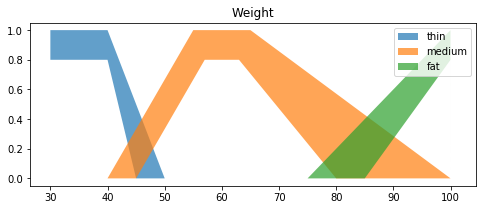

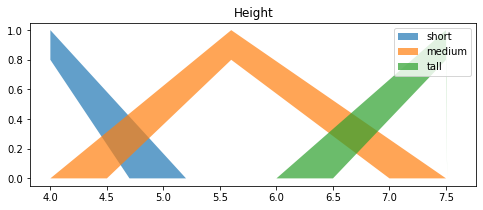

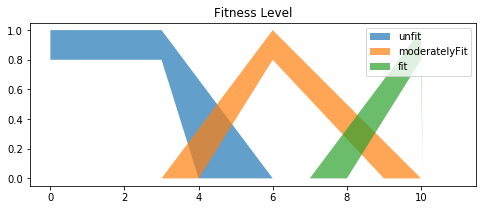

In [20]:
'''
Ploting the membership values for each of antecedent and consequent
'''
fuzz_IT2_plot_mf(x_weight, w, w_types, 'Weight')
fuzz_IT2_plot_mf(x_height, h, h_types, 'Height')
fuzz_IT2_plot_mf(x_fitnessLevel, f, f_types, 'Fitness Level')

In [21]:
'''
Displays the list of linguistic terms of the consequent, corresponding to a value.
'''
for i in range(len(f_types)):
    print(f'{i+1}) {f_types[i]}')

1) unfit
2) moderatelyFit
3) fit


In [22]:
'''
rule_lst -- list of rules decided
'''
rule_lst = fuzz_make_rules(w_types, h_types)

Enter the number corresponding to the above fitness level menu for rule thin and short: 3
Enter the number corresponding to the above fitness level menu for rule thin and medium: 2
Enter the number corresponding to the above fitness level menu for rule thin and tall: 1
Enter the number corresponding to the above fitness level menu for rule medium and short: 2
Enter the number corresponding to the above fitness level menu for rule medium and medium: 3
Enter the number corresponding to the above fitness level menu for rule medium and tall: 2
Enter the number corresponding to the above fitness level menu for rule fat and short: 1
Enter the number corresponding to the above fitness level menu for rule fat and medium: 2
Enter the number corresponding to the above fitness level menu for rule fat and tall: 3


In [96]:
weight = int(input('Enter Value for weight:'))
height = float(input('Enter value for height:'))

Enter Value for weight:57
Enter value for height:5


In [97]:
'''
x_memvalue -- membership value at a particular single value for the antecedent x(weight and height here).
'''
w_memvalue = fuzz_IT2_Interplot_mem(x_weight, w, weight)
h_memvalue = fuzz_IT2_Interplot_mem(x_height, h, height)

In [98]:
w_memvalue[0]

[0.0, 1.0, 0.0]

In [99]:
w_memvalue[1]

[0.0, 0.7999999999997187, 0.0]

In [100]:
h_memvalue[0]

[0.1666666666666668, 0.6250000000000001, 0.0]

In [101]:
h_memvalue[1]

[0.0, 0.36363636363636376, 0.0]

In [102]:
'''
rule -- 2D tuple of maped rule for upper and lower membership values.
fitness_used -- list of fitness values decided based the rule_lst(to be used for ploting)
'''
rule, fitness_used = fuzz_mapRule(w_memvalue, h_memvalue, f, rule_lst)


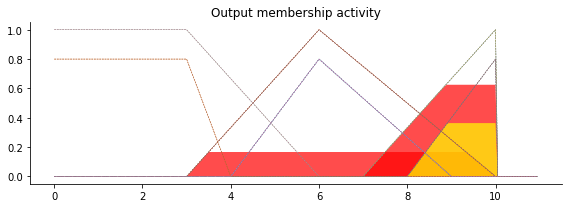

In [103]:
fuzz_plot_outputMf(x_fitnessLevel, rule, fitness_used)

In [104]:
'''
R_combined -- 2D tuple containing aggregated rule for upper and lower membership values.
'''
R_combined = fuzz_IT2_aggregation(rule)

In [105]:
'''
fitnessLevel -- output value(centroid value)
fitness_activation -- corresponding membership value of output
'''
fitnessLevel, fitness_activation = fuzz_IT2_defuzz(x_fitnessLevel, R_combined)

In [106]:
R_combined[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01666667, 0.03333333, 0.05      , 0.06666667,
       0.08333333, 0.1       , 0.11666667, 0.13333333, 0.15      ,
       0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666

In [107]:
R_combined[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Output = 7.04 
Corresponding Membership value = 0.17


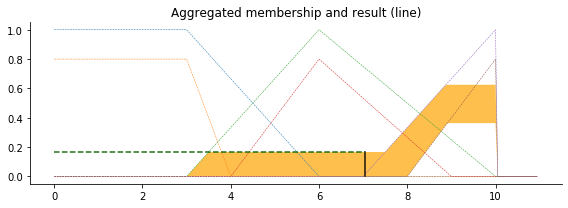

In [108]:
fuzz_IT2_output(x_fitnessLevel, f, fitnessLevel, fitness_activation, R_combined)